# Indian Liver Patients - Analysis and Prediction  
# By Venkata Durga Avinash Bobbala



# Stat5000 Final Project









# Introduction
We know that there has been an increase in liver disease due to various factors. Using this dataset we are going to try to come up with the best prediction algorithm to help doctors with their work. In order to do this we are going to have to look into the data and use different classification methods to find what works best for the data we have.

# Importing required packages

In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np

# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# Data Resampling
from sklearn.utils import resample

# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Data Splitting
from sklearn.model_selection import train_test_split


# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

# Importing the dataset
The dataset was downloaded from UCI Machine learning repository.This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.

In [835]:
data=pd.read_csv('indian_liver_patient.csv')
data.shape

(583, 11)

In [836]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


What we can see here is that the data contains (583 rows by 11 columns).This means the that df_liver contains 583 observations + 10 features + 1 response (or target) variable. The response variable is "Dataset". Furthermore, df_liver consists of 5 Floats, 5 integers and 1 object. Therefore, the goal is to convert the object to numerical values so we can apply machine learning (ML) algorithms. We also notice that the column, 'Albumin_and_Globulin_Ratio' contains missing values (Nan).

In [837]:
# We can performing some simple statistical inferences to get a good feel of the data
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


From the descriptive statistics above, we notice that the minimum age is 4 and the maximum is 90. Based on the information on this dataset, it was suggested that anyone above the age of 89 should be treated as 90. So we can change that through the creation of a new dataframe. Furthermore, we notice missing values in the column "Albumin_and_Globulin_Ratio", which we can deal with shortly. Lastly, it would be a good idea to figure out the ranges of healthy patients in order to figure out where each patient lies.

# Healthy Ranges for the 10 feature columns

Total_Bilirubin = 0.1 to 1.2 mg/dL = 1.71 to 20.5 umol/L

Direct_Bilirubin = < 0.3 mg/dL = < 5.1 umol/L

Alkaline_Phosphatase = 44 to 147 IU/L (High levels of ALP are seen in children undergoing growth and pregnant women)

Alamine_Aminotransferase = 29 to 33 IU/L (Age and gender can affect the value)

Aspartate_Aminotransferase = 1 to 45 U/L (Values are slightly lower in females) 

Total_Proteins = 6.0 to 8.3 g/dL

Albumin = 3.4 to 5.4 g/dL

Albumin_and_Globulin_Ratio = Adult: 3.7 to 5.2 g/dL; Older Adult: 3.2 to 4.6 g/dL; >90 yr: 2.9 to 4.5 g/dL
            
The above normal values are obtained from google.

In [838]:
data.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


# Checking for Missing values and Duplicates
There are 4 missing values in Albumin_and_Globulin_Ratio and found 13 instances of duplicates.

In [839]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [840]:
data.duplicated().sum()

13

Using mean to fill the missing values. Similarly, we can also use mode or median instead of mean but I feel mean may be more accurate to use in this dataset.

In [841]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [842]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [843]:
data = data.drop_duplicates()

In [844]:
data.duplicated().sum()

0

# Coverting categorical variable to numeric 
The representation of gender as male and female are coverted to male as 1 and female as 0.

In [845]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [846]:
data.tail(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
573,32,1,3.7,1.6,612,50,88,6.2,1.9,0.40,1
574,32,1,12.1,6.0,515,48,92,6.6,2.4,0.50,1
575,32,1,25.0,13.7,560,41,88,7.9,2.5,2.50,1
576,32,1,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,1,12.7,8.4,190,28,47,5.4,2.6,0.90,1
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,1,1.0,0.3,216,21,24,7.3,4.4,1.50,2


# Representation of outcome whether a person is suffering from liver disease or not.
Value 1 represents the prople with liver disease and 2 represent the prople without liver disease.

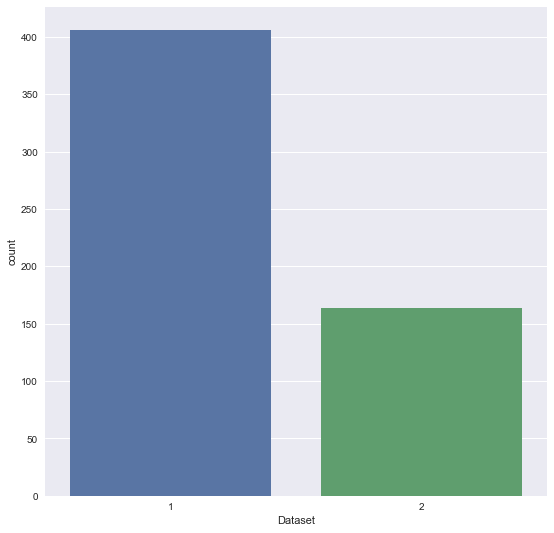

In [847]:
plt.figure(figsize=(9,9))
sns.countplot(data = data, x = 'Dataset');

# Visualizing data with liver disease along with Gender


Text(0.5, 0, 'Patient Condition')

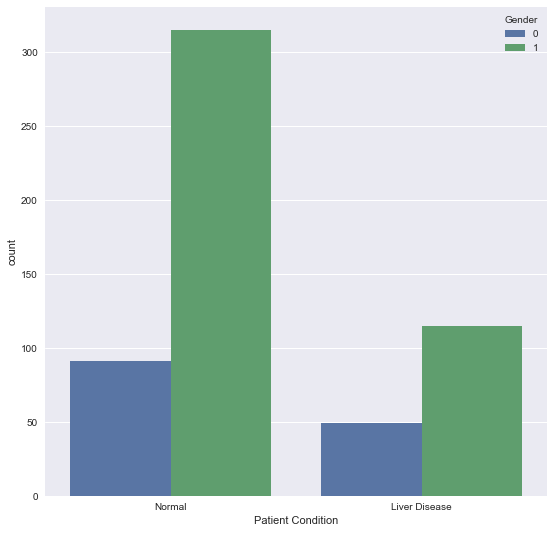

In [848]:
plt.figure(figsize=(9,9))
ax = sns.countplot(x = data['Dataset'].apply(lambda x:'Normal' if x == 1 else 'Liver Disease'), hue=data['Gender'])
ax.set_xlabel('Patient Condition')

We can observe that men are mostly suffering from liver diseases compared to women but also It's worth noting that this dataset is unbalanced in both Gender and Liver Patient status; there are considerably more men and liver patients than women and non-liver patients. It's not necessarily a problem in this case but extra caution will be required when building predictive models. So, for now we are going to balance the dataset based on outcome(Dataset) in future.

# Exploring the data visually
Let's try to find any correlations between the features.

C:\Users\avina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

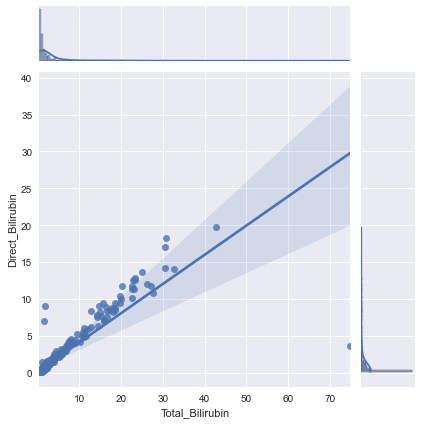

In [849]:
#Jointplot between Total_Bilirubin and Direct_Bilirubin
plt.figure(figsize=(12,12))
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=data, kind="reg")

C:\Users\avina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

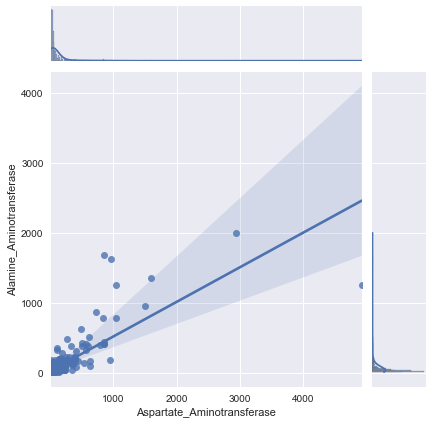

In [850]:
#Jointplot between Aspartate_Aminotransferase and Alamine_Aminotransferase
plt.figure(figsize=(12,12))
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=data, kind="reg")

C:\Users\avina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

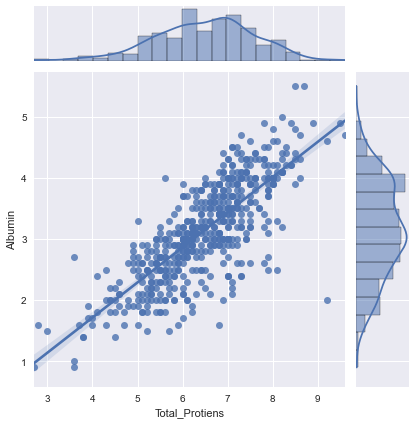

In [851]:
#Jointplot between Total_Protiens and Albumin
plt.figure(figsize=(12,12))
sns.jointplot("Total_Protiens", "Albumin", data=data, kind="reg")

C:\Users\avina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

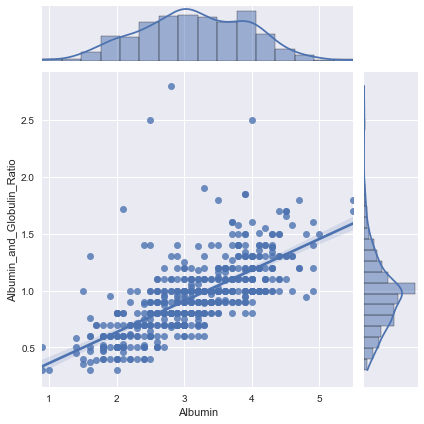

In [852]:
#Jointplot between Albumin and Albumin_and_Globulin_Ratio
plt.figure(figsize=(12,12))
sns.jointplot("Albumin", "Albumin_and_Globulin_Ratio", data=data, kind="reg")

Based on the correlative pair plots, we find some interesting results directly.

-Positive correlations:

Total Bilirubin and Direct Bilirubin (vice-versa)

Alamine Aminotransferase and Aspartate Aminotransferase (vice-versa)

Total Protein and Albumin (vice-versa)

Albumin and Globulin Ratio and Albumin (vice-versa)

# Correlation
A correlation matrix is a handy way to calculate the pairwise correlation coefficients between two or more (numeric) variables. The Pandas data frame has this functionality built-in to its corr() method. Thus, the top (or bottom, depending on your preferences) of every correlation matrix is redundant. The correlation between each variable and itself is 1.0, hence the diagonal.

In [853]:
data.corr().style.background_gradient(cmap='Reds')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.058237,0.011500,0.007050,0.081673,-0.083383,-0.016753,-0.197052,-0.271170,-0.215633,-0.138093
Gender,0.058237,1.000000,0.090298,0.101730,-0.023014,0.084317,0.081497,-0.085895,-0.091369,-0.005566,-0.078501
Total_Bilirubin,0.011500,0.090298,1.000000,0.874116,0.206239,0.217471,0.238678,-0.008588,-0.224124,-0.207621,-0.224430
Direct_Bilirubin,0.007050,0.101730,0.874116,1.000000,0.234609,0.237450,0.258489,-0.000875,-0.230751,-0.201386,-0.250666
Alkaline_Phosphotase,0.081673,-0.023014,0.206239,0.234609,1.000000,0.126830,0.167230,-0.030048,-0.168318,-0.236028,-0.187560
Alamine_Aminotransferase,-0.083383,0.084317,0.217471,0.237450,0.126830,1.000000,0.791857,-0.035193,-0.027973,-0.006516,-0.161917
Aspartate_Aminotransferase,-0.016753,0.081497,0.238678,0.258489,0.167230,0.791857,1.000000,-0.022000,-0.085180,-0.072877,-0.151101
Total_Protiens,-0.197052,-0.085895,-0.008588,-0.000875,-0.030048,-0.035193,-0.022000,1.000000,0.784731,0.233576,0.037794
Albumin,-0.271170,-0.091369,-0.224124,-0.230751,-0.168318,-0.027973,-0.085180,0.784731,1.000000,0.684087,0.166835
Albumin_and_Globulin_Ratio,-0.215633,-0.005566,-0.207621,-0.201386,-0.236028,-0.006516,-0.072877,0.233576,0.684087,1.000000,0.170523


The above correlation heatmap demonstrates strong positive (closer to 1) correlation between Total_Bilirubin and Direct_bilirubin, Alamine_Aminotransferase	and Aspartate_Aminotransferase, Total_Protiens and Albumin, Albumin and Albumin_and_Globulin_Ratio.

# Visualizing the relation of all the columns with the outcome(whether a person is liver patient or not).

Text(0.5, 0, 'Total_Bilirubin')

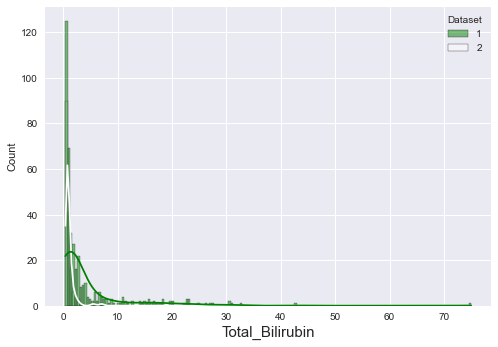

In [854]:

plt.style.use("seaborn")


# Histplot between Total Bilirubin and outcome.
ax = sns.histplot(x = data["Total_Bilirubin"], hue = data["Dataset"], palette="ocean", kde=True)
ax.set_xlabel("Total_Bilirubin",fontsize=15)




Text(0.5, 0, 'Direct_Bilirubin')

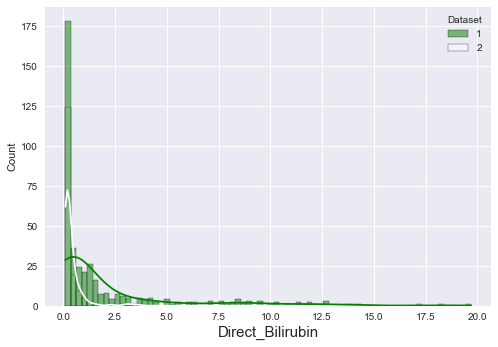

In [855]:

# Histplot between Direct_Bilirubin and outcome.
ax = sns.histplot(x = data["Direct_Bilirubin"], hue = data["Dataset"], palette="ocean", kde=True)
ax.set_xlabel("Direct_Bilirubin",fontsize=15)





Text(0.5, 0, 'Alkaline_Phosphotase')

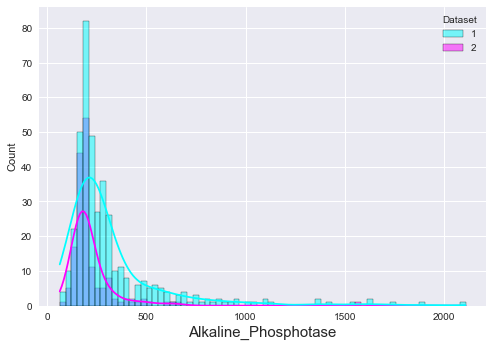

In [856]:
# Histplot between Alkaline_Phosphotase and outcome.
ax = sns.histplot(x = data["Alkaline_Phosphotase"], hue = data["Dataset"], palette="cool", kde=True)
ax.set_xlabel("Alkaline_Phosphotase",fontsize=15)





Text(0.5, 0, 'Alamine_Aminotransferase')

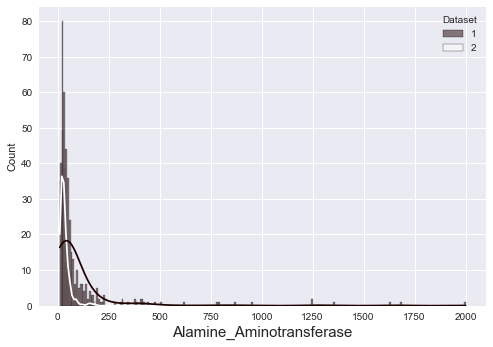

In [857]:
# Histplot between Alamine_Aminotransferase and outcome.
ax = sns.histplot(x = data["Alamine_Aminotransferase"], hue = data["Dataset"], palette="pink", kde=True)
ax.set_xlabel("Alamine_Aminotransferase",fontsize=15)




Text(0.5, 0, 'Aspartate_Aminotransferase')

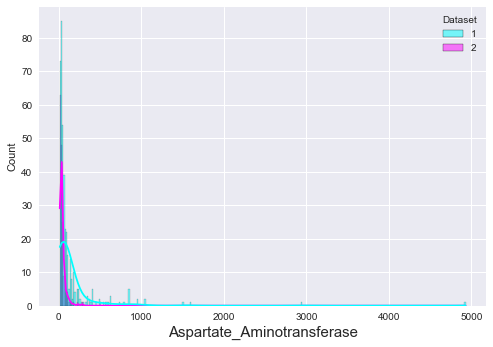

In [858]:
# Histplot between Aspartate_Aminotransferase and outcome.
ax = sns.histplot(x = data["Aspartate_Aminotransferase"], hue = data["Dataset"], palette="cool", kde=True)
ax.set_xlabel("Aspartate_Aminotransferase",fontsize=15)





Text(0.5, 0, 'Total_Protiens')

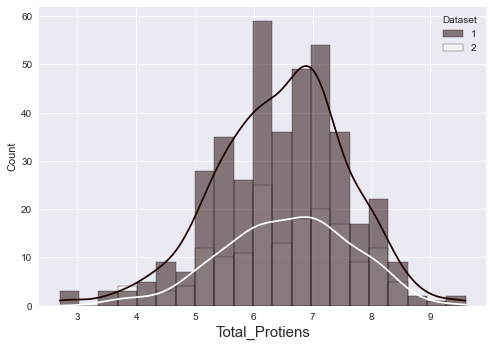

In [859]:
# Histplot between Total_Protiens and outcome.
ax = sns.histplot(x = data["Total_Protiens"], hue = data["Dataset"], palette="pink", kde=True)
ax.set_xlabel("Total_Protiens",fontsize=15)




Text(0.5, 0, 'Albumin')

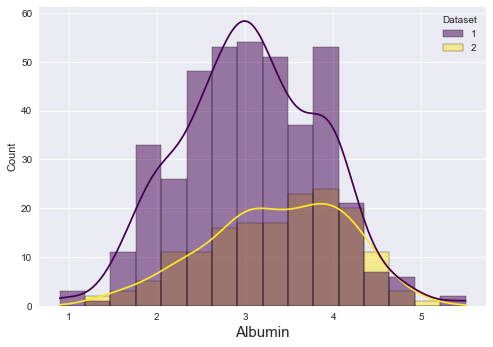

In [860]:
# Histplot between Albumin and outcome.
ax = sns.histplot(x = data["Albumin"], hue = data["Dataset"], palette="viridis", kde=True)
ax.set_xlabel("Albumin",fontsize=15)




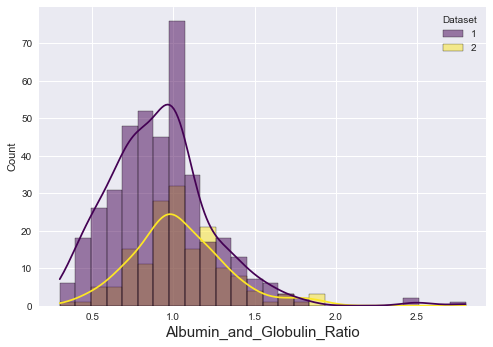

In [861]:
# Histplot between Albumin_and_Globulin_Ratio and outcome.
ax = sns.histplot(x = data["Albumin_and_Globulin_Ratio"], hue = data["Dataset"], palette="viridis", kde=True)
ax.set_xlabel("Albumin_and_Globulin_Ratio",fontsize=15);

# Visualize the effect of the dataset(with or without disease) based on both Age and Gender.

C:\Users\avina\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\avina\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\avina\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'Male')

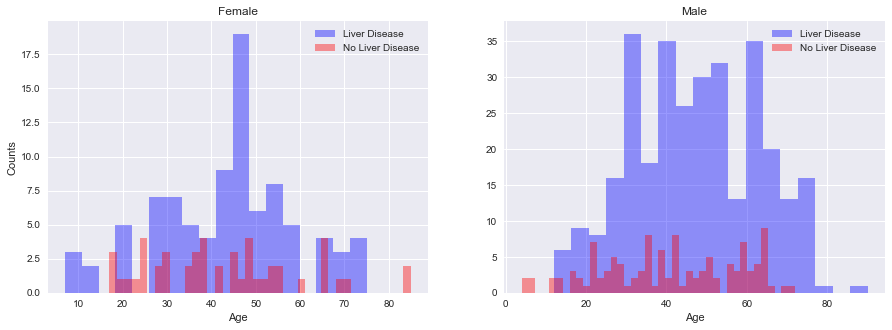

In [862]:
# Figure configuration
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(data[data['Gender'] == 0][data[data['Gender'] == 0]['Dataset'] == 1]['Age'], bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(data[data['Gender'] == 0][data[data['Gender'] == 0]['Dataset'] == 2]['Age'], bins=40, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(data[data['Gender'] == 1][data[data['Gender'] == 1]['Dataset'] == 1]['Age'], bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(data[data['Gender'] == 1][data[data['Gender'] == 1]['Dataset'] == 2]['Age'], bins=40, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male')

# This distribution plot shows some interesting things,

1)On average, women tend to have less cases of liver disease than men.

2)The greatest number of women without liver disease were about 38 yrs old.

3)Girls around the age of 10 had liver disease, this may be a genetic link.

4)Men are more prone to liver disease (may be due to alcoholism).

5)The greatest number of men without liver diseae were about 38 yrs old.

6)Women at age of 48 are more prone to liver diseases.

7)Men at age of 30 are more prone to liver diseases.

# Hypothesis Testing

In [863]:

df_liver_hyp = data
df_liver_hyp.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [864]:
# Create a 'Hypothesis' column and set that equal to 0
df_liver_hyp['Hypothesis'] = 0

# Our hypothesis is that if the patients have liver disease then set the hypothesis column to 1
df_liver_hyp.loc[df_liver_hyp['Dataset'] == 1, 'Hypothesis'] = 1

# Next, to check if our hypothesis is correct I will create another column called Result and set that equal to 0
df_liver_hyp['Result'] = 0

# If the Dataset column agrees with our Hypothesis column, I am going to update the 'Result' column by 1.
df_liver_hyp.loc[df_liver_hyp['Dataset'] == df_liver_hyp['Hypothesis'], 'Result'] = 1

df_liver_hyp.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Hypothesis,Result
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1,1


In [865]:
# I will now find the percentage of passengers that have liver disease
round(df_liver_hyp['Result'].value_counts(normalize=True) * 100, 3)


1    71.228
0    28.772
Name: Result, dtype: float64

Based on the simple hypothesis test above, we find that ~ 71% of patients have liver disease. Now we can proceed to using more sophisticated machine learning models to estimate and predict liver disease in df_liver using supervised and un-supervised models. I will also be printing out the percent score and accuracy of each model.

# Balancing the dataset using resampling technique.
Oversampling methods duplicate examples in the minority class or synthesize new examples from the examples in the minority class.

In [866]:
target1=data[data['Dataset']==1]
target0=data[data['Dataset']==2]
target0=resample(target0,replace=True,n_samples=len(target1),random_state=40)
target=pd.concat([target1,target0])
target['Dataset'].value_counts()

1    406
2    406
Name: Dataset, dtype: int64

In [867]:
data = target

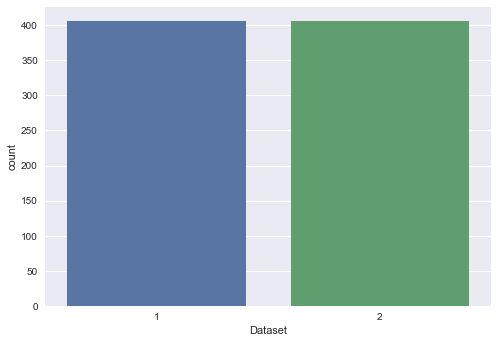

In [868]:
sns.countplot(data = data, x = 'Dataset');

In [869]:
np.shape(data)

(812, 13)

# Prediction
Here it is a supervised learning method as we have a class label in the dataset. So therefore, we used
classification algorithms to predict the output. The classification algorithms like logistic, random
forest, decision tree, knn were used.

# Training and Testing the Data
Here, we are trying to predict whether the patient has an Unhealthy Liver or not using the given data. Hence, the Outcome will be the y label and rest of the data will be the X or the input data.

In [870]:
Y = data['Dataset']
X = data.drop(['Dataset', "Hypothesis", "Result"], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.4, random_state=1)

# Logistic regression
Logistic regression, also known as logit regression or logit model, is a mathematical
model used in statistics to estimate (guess) the probability of an event occurring having
been given some previous data. Logistic regression works with binary data, where either
the event happens (1) or the event does not happen (0).

In [871]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[ 98  64]
 [ 42 121]]


Accuracy of Logistic Regression: 67.38461538461539 

              precision    recall  f1-score   support

           1       0.70      0.60      0.65       162
           2       0.65      0.74      0.70       163

    accuracy                           0.67       325
   macro avg       0.68      0.67      0.67       325
weighted avg       0.68      0.67      0.67       325



# KNN
A k-nearest-neighbor algorithm, often abbreviated k-nn, is an approach to data classification that estimates how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in.
K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set.

In [872]:
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y, knn_predict))

confussion matrix
[[121  41]
 [ 16 147]]


Accuracy of k-NN Classification: 82.46153846153847 

              precision    recall  f1-score   support

           1       0.88      0.75      0.81       162
           2       0.78      0.90      0.84       163

    accuracy                           0.82       325
   macro avg       0.83      0.82      0.82       325
weighted avg       0.83      0.82      0.82       325



# Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.

In [873]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confussion matrix
[[119  43]
 [ 15 148]]


Accuracy of Random Forest: 82.15384615384616 

              precision    recall  f1-score   support

           1       0.89      0.73      0.80       162
           2       0.77      0.91      0.84       163

    accuracy                           0.82       325
   macro avg       0.83      0.82      0.82       325
weighted avg       0.83      0.82      0.82       325



# Decision Tree
Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node(terminal node) holds a class label.

In [874]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confussion matrix
[[114  48]
 [ 19 144]]


Accuracy of DecisionTreeClassifier: 79.38461538461539 

              precision    recall  f1-score   support

           1       0.86      0.70      0.77       162
           2       0.75      0.88      0.81       163

    accuracy                           0.79       325
   macro avg       0.80      0.79      0.79       325
weighted avg       0.80      0.79      0.79       325



# Comparing the Models and their Accuracies.

In [875]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Random Forest',
                                   'Decision Tree'], 'Accuracy': [lr_acc_score*100, knn_acc_score*100, 
                                                                                      rf_acc_score*100, dt_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,67.384615
1,K-Nearest Neighbour,82.461538
2,Random Forest,82.153846
3,Decision Tree,79.384615


Here We can observe that K-NN and Random Forest gave the best accuracy among the other models.

# Using Random Forest for predicting whether a person has liver disease or not.
Considering to take sample values

In [879]:
#Healthy person values were taken as sample and the model predicted that the person is healthy.
print('Testing the model:',rf.predict(np.array([[50,1,1.2,0.3,100,30,20,7,4.1,3.5]])))

Testing the model: [2]


In [880]:
#Unhealthy person values were taken as sample and the model predicted that the person is unhealthy.
print('Testing the model:',rf.predict(np.array([[60,1,2,6,300,45,60,17,9.2,8]])))

Testing the model: [1]


# Conclusion
It appears that the two best machine learning models are k-NN and Random forest as had the highest score and accuracy. Interestingly, I wasn't that far off from using the simple hypothesis testing, which gave me 71.355%. Balancing of data resulted increase of accuracy.We can conclude that basically in India men were more addicted to alcohol which causes liver diseases so we can assume that would be the reason as men were mostly suffering from liver diseases.

# dgngm
